#### Analyze text with Title/Abstract of clusters 


In [2]:
import sys
!{sys.executable} -m pip install umap-learn

In [57]:
import sys
!{sys.executable} -m pip install gensim

     |████████████████████████████████| 23.9 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 8.2 MB/s  eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import umap

In [2]:
from sklearn.manifold import TSNE

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

import time 
from time import sleep

sc = SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [4]:
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [5]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType,ArrayType

In [6]:
sample_seed_1_cluser_assinged = spark.read.parquet("s3://hids511final/corid_embedding_pca_200_sample_seed_01_1_KMEANS_PRED_doublechecksample.parquet")


In [7]:
sample_seed_1_cluser_assinged.sort("_c0", ascending=True).show()

+--------+--------------------+--------------------+--------+----------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|
+--------+--------------------+--------------------+--------+----------+
|001skdgj|[1.01681923866271...|[-20.032345850624...|001skdgj|        10|
|002f78jk|[-4.9741296768188...|[33.9081174277701...|002f78jk|        47|
|00s30a1k|[-4.5005540847778...|[37.4830379244023...|00s30a1k|        47|
|00t12unr|[-4.3244304656982...|[34.1231454835673...|00t12unr|        47|
|00t12unr|[-4.3244304656982...|[34.1231454835673...|00t12unr|        47|
|012ziqe8|[1.79250776767730...|[-13.160795297727...|012ziqe8|         8|
|018bikme|[-7.9772782325744...|[34.3424758739515...|018bikme|        11|
|01duo6hp|[-3.6498296260833...|[38.8432224449848...|01duo6hp|        26|
|01lvglcd|[0.42638444900512...|[-15.320312025515...|01lvglcd|        12|
|01xyjaih|[-5.9328069686889...|[41.2406117239674...|01xyjaih|        17|
|01yq8d0k|[-0.0765987634658...|[20.4411396075078...

In [8]:
metadata = spark.read.csv('s3://ai2-semanticscholar-cord-19/2021-04-19/metadata.csv/',header = True)

In [9]:
metadata.columns

['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [10]:
metadata[['cord_uid','title','abstract','authors','journal','publish_time']].show()

+--------+--------------------+--------------------+--------------------+--------------------+------------+
|cord_uid|               title|            abstract|             authors|             journal|publish_time|
+--------+--------------------+--------------------+--------------------+--------------------+------------+
|ug7v899j|Clinical features...|OBJECTIVE: This r...|Madani, Tariq A; ...|      BMC Infect Dis|  2001-07-04|
|02tnwd4m|Nitric oxide: a p...|Inflammatory dise...|Vliet, Albert van...|          Respir Res|  2000-08-15|
|ejv2xln0|Surfactant protei...|Surfactant protei...|     Crouch, Erika C|          Respir Res|  2000-08-25|
|2b73a28n|Role of endotheli...|Endothelin-1 (ET-...|Fagan, Karen A; M...|          Respir Res|  2001-02-22|
|9785vg6d|Gene expression i...|Respiratory syncy...|Domachowske, Jose...|          Respir Res|  2001-05-11|
|zjufx4fo|Sequence requirem...|Nidovirus subgeno...|Pasternak, Alexan...|    The EMBO Journal|  2001-12-17|
|5yhe786e|Debate: Transfusi.

In [11]:
sample_seed_1_cluser_assinged_metadata= sample_seed_1_cluser_assinged.join(metadata[['cord_uid','title','abstract','authors','journal','publish_time']],
                                                   sample_seed_1_cluser_assinged["_c0"] == metadata["cord_uid"],"left")




In [12]:
sample_seed_1_cluser_assinged_metadata.show()

+--------+--------------------+--------------------+--------+----------+--------+--------------------+--------------------+--------------------+--------------------+------------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|cord_uid|               title|            abstract|             authors|             journal|publish_time|
+--------+--------------------+--------------------+--------+----------+--------+--------------------+--------------------+--------------------+--------------------+------------+
|1qswwxw8|[-5.6927232742309...|[15.6444404052320...|1qswwxw8|        15|1qswwxw8|Design of a Web-b...|It is important t...|   Xue, C.; Zeng, X.|2020 3rd Internat...|        2020|
|5vvl0npo|[-2.3355121612548...|[47.8782494955001...|5vvl0npo|        28|5vvl0npo|Clinical Misdiagn...|BACKGROUND: Simil...|Eshaghi, Hamid; Z...| Case Rep Infect Dis|  2021-03-31|
|5wraup2d|[1.34078013896942...|[-0.0133305518779...|5wraup2d|        32|5wraup2d|                null|The

### From TSNE sample -- 

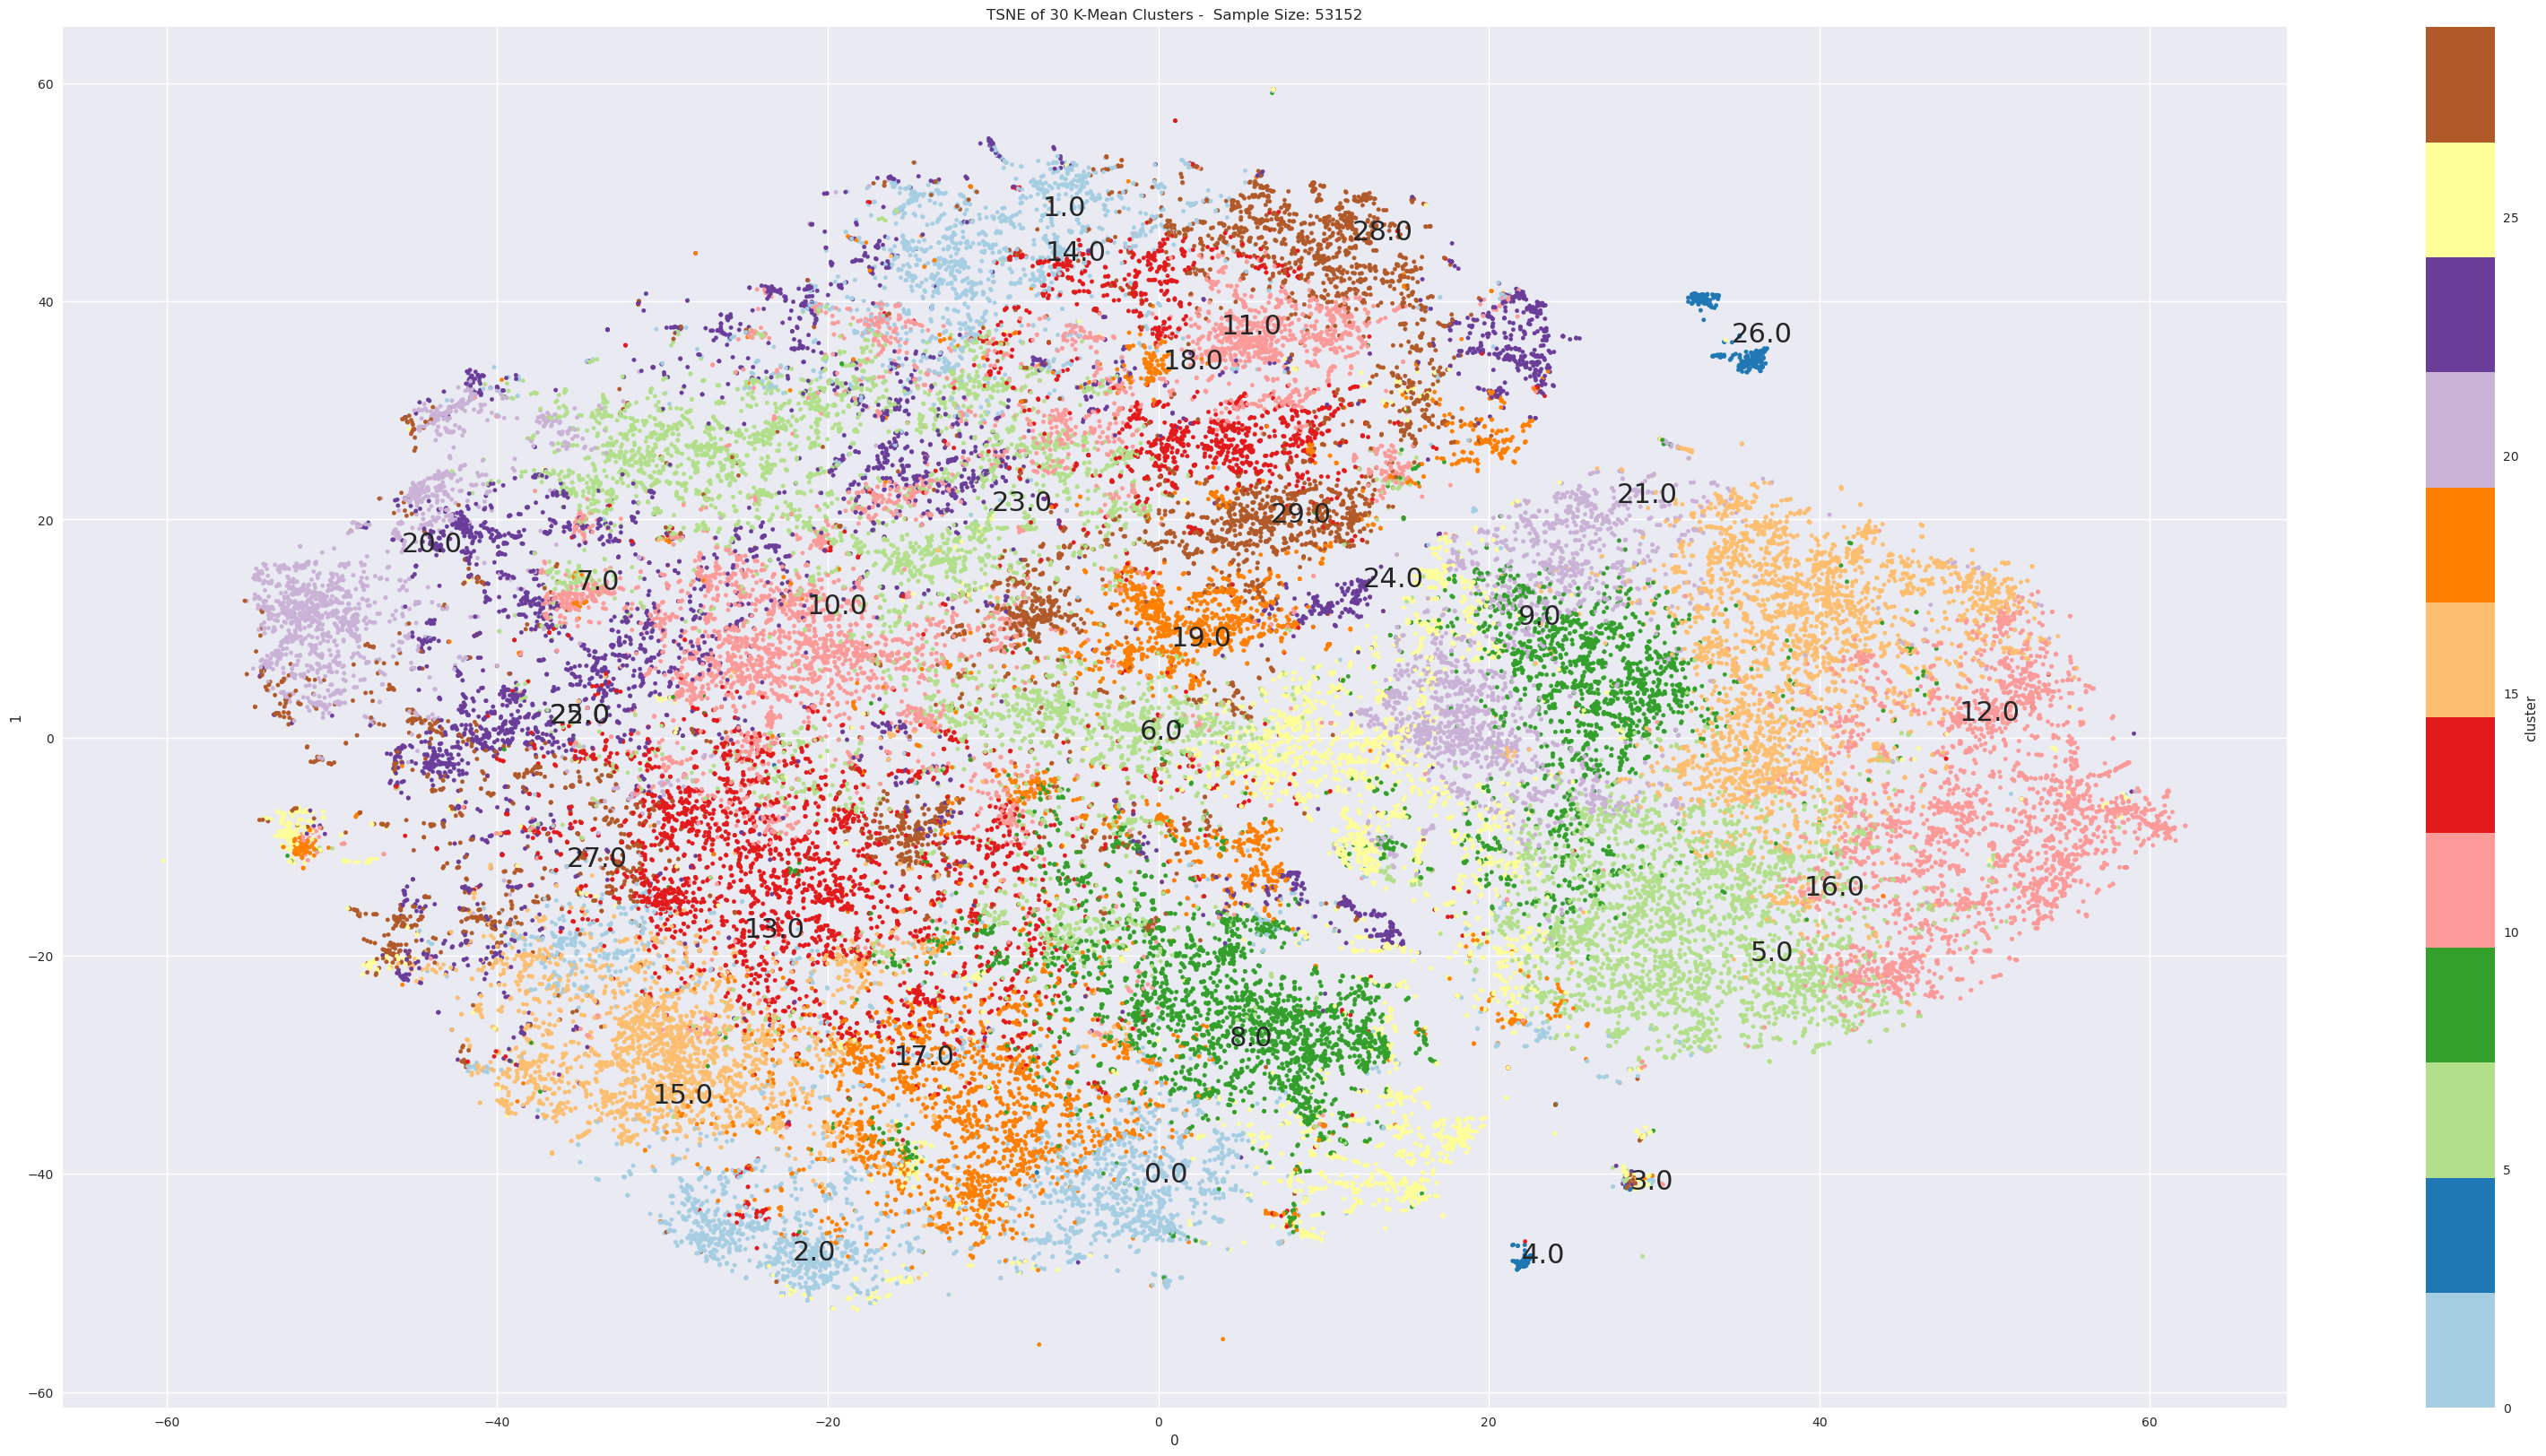

In [40]:

#for cmap in c_map_opt:

ax = TSNE_2d.plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20),title = 'TSNE of {} K-Mean Clusters -  Sample Size: {}'.format(len(TSNE_2d.groupby('cluster').first()),len(X_embedded)))


for i, txt in enumerate(TSNE_2d.groupby('cluster').first().reset_index().values):
    ax.annotate(txt[0], (txt[1], txt[2]),fontsize=22)
    
plt.show()
plt.close()

#### Which clusters had the most publications in 2021? or (Of papers published in 2021, what is their distirbution across clusters)

In [ ]:
sample_seed_1_cluser_assinged_metadata.distinct().filter(sample_seed_1_cluser_assinged_metadata.publish_time.contains('2021')).groupBy("prediction").count().sort('count',ascending=False).show()

#### What are the documents that make up cluster 33 like? 

In [13]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == 33).show()

+--------+--------------------+--------------------+--------+----------+--------+--------------------+--------+--------------------+--------------------+------------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|cord_uid|               title|abstract|             authors|             journal|publish_time|
+--------+--------------------+--------------------+--------+----------+--------+--------------------+--------+--------------------+--------------------+------------+
|2mmboxkn|[0.36178261041641...|[-27.227338505321...|2mmboxkn|        33|2mmboxkn|Could severe COVI...|    null|Chatzidionysiou, ...|                null|        2020|
|2mmboxkn|[0.36178261041641...|[-27.227338505321...|2mmboxkn|        33|2mmboxkn|Could severe COVI...|    null|Chatzidionysiou, ...|                null|        2020|
|2mmboxkn|[0.36178261041641...|[-27.227338505321...|2mmboxkn|        33|2mmboxkn|Could severe COVI...|    null|Chatzidionysiou, ...|                null|        2020

In [15]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == 33).count() ## Revise sampling 

292

In [16]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == 33).distinct().count()

178

In [17]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == 33).distinct().groupBy("journal").count().sort('count',ascending=False).show()

+--------------------+-----+
|             journal|count|
+--------------------+-----+
|                null|   12|
|Lancet Diabetes E...|    5|
|      Ann Intern Med|    5|
|    Reactions Weekly|    4|
|                 BMJ|    4|
|           Crit Care|    3|
|        Br J Anaesth|    2|
|J Heart Lung Tran...|    2|
|          Thromb Res|    2|
|         Gastro-News|    2|
| Am J Obstet Gynecol|    2|
|     Am J Ophthalmol|    2|
|                 Gut|    2|
|        Neurosurgery|    2|
|           Neurology|    2|
|Aliment Pharmacol...|    2|
|  Intensive Care Med|    2|
|Mediterr J Hemato...|    2|
|J Allergy Clin Im...|    2|
|Am. j. respir. cr...|    2|
+--------------------+-----+
only showing top 20 rows



In [246]:
sample_seed_1_cluser_assinged_metadata.distinct().groupBy("publish_time").count().sort('count',ascending=False).show()

+------------+-----+
|publish_time|count|
+------------+-----+
|        2020| 2215|
|        2021|  632|
|        null|  154|
|        2015|   47|
|        2016|   38|
|        2018|   38|
|        2017|   36|
|        2014|   35|
|        2019|   31|
|        2013|   25|
|  2020-09-01|   23|
|        2010|   22|
|  2020-07-01|   21|
|  2021-03-01|   20|
|  2020-10-01|   19|
|        2008|   17|
|  2020-06-22|   17|
|        2011|   16|
|  2021-02-01|   15|
|        2007|   15|
+------------+-----+
only showing top 20 rows



In [249]:
sample_seed_1_cluser_assinged_metadata.distinct().filter(sample_seed_1_cluser_assinged_metadata.publish_time.contains('2021')).groupBy("prediction").count().sort('count',ascending=False).show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   70|
|        27|   46|
|        29|   45|
|        11|   44|
|        26|   42|
|        24|   41|
|        23|   40|
|         7|   38|
|        17|   38|
|        13|   37|
|        47|   37|
|        34|   36|
|        48|   35|
|         8|   34|
|         4|   34|
|        39|   33|
|        33|   33|
|         5|   33|
|        37|   32|
|        41|   30|
+----------+-----+
only showing top 20 rows



### Pull All documents from Topic 33

In [14]:
cluster_of_interest = 33

In [15]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == cluster_of_interest).distinct().groupBy("publish_time").count().sort('count',ascending=False).show()

+------------+-----+
|publish_time|count|
+------------+-----+
|        2020|   72|
|        2021|   19|
|        null|    5|
|  2020-05-01|    3|
|  2020-10-01|    2|
|  2020-05-15|    2|
|  2020-07-25|    2|
|  2020-08-28|    2|
|        2018|    2|
|  2020-05-20|    2|
|  2020-05-26|    2|
|  2020-06-03|    2|
|  2020-07-29|    2|
|  2020-09-12|    1|
|        2012|    1|
|  2020-07-12|    1|
|  2020-08-09|    1|
|        2016|    1|
|  2020-09-11|    1|
|  2020-10-21|    1|
+------------+-----+
only showing top 20 rows



In [ ]:
sample_seed_1_cluser_assinged_metadata_DF = sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == cluster_of_interest).distinct().toPandas()

In [ ]:
sample_seed_1_cluser_assinged_metadata_DF

In [20]:
time_flag = []
for i in sample_seed_1_cluser_assinged_metadata_DF['publish_time'].values:
    try:
        if '20' in i: 
            time_flag.append(1)
        else:
            time_flag.append(0)
    except:
        time_flag.append(0)
sample_seed_1_cluser_assinged_metadata_DF['time_flag'] = time_flag

In [21]:
sample_seed_1_cluser_assinged_metadata_DF['time_flag'] = time_flag

In [22]:
sample_seed_1_cluser_assinged_metadata_DF['publish_time'].value_counts().head(60)

2020          72
2021          19
2020-05-01     3
2018           2
2020-05-20     2
2020-06-03     2
2020-07-25     2
2020-10-01     2
2020-08-28     2
2020-07-29     2
2020-05-26     2
2020-05-15     2
2020-10-06     1
2020-06-19     1
2020-09-12     1
2020-08-21     1
2020-12-31     1
2003           1
2020-04-10     1
2020-08-09     1
2020-05-10     1
2021-02-26     1
2021-03-27     1
2020-04-18     1
2014           1
2021-01-23     1
2020-04-15     1
2020-11-19     1
1999           1
2020-05-28     1
2016           1
2021-01-16     1
2020-03-19     1
2020-07-22     1
2020-08-03     1
2020-11-05     1
2021-04-13     1
2021-03-03     1
2020-04-08     1
2021-02-28     1
2020-09-11     1
2020-09-08     1
2015           1
2020-02-07     1
2020-09-09     1
2021-02-06     1
2020-11-12     1
2020-06-01     1
2021-02-17     1
2020-07-12     1
2020-04-21     1
2012           1
2020-02-24     1
2021-04-01     1
2020-09-19     1
2020-10-02     1
2021-01-09     1
2020-08-27     1
2020-06-22    

In [23]:
sample_seed_1_cluser_assinged_metadata_DF.loc[sample_seed_1_cluser_assinged_metadata_DF['time_flag']==1]

,_c0,EMBEDDING,pca_features,_c0_pred,prediction,cord_uid,title,abstract,authors,journal,publish_time,time_flag
0,2mmboxkn,"[0.36178261041641235, -5.280364036560059, 3.44...","[-27.227338505321494, 41.83335023601186, -14.7...",2mmboxkn,33,2mmboxkn,Could severe COVID-19 be considered a compleme...,None,"Chatzidionysiou, Katerina; Svenungsson, Elisab...",None,2020,1
1,hentmh49,"[-2.5299277305603027, -4.559889793395996, 3.89...","[-27.086629466424046, 32.54907978428423, -21.8...",hentmh49,33,hentmh49,Otology and Neurotology in a Post-COVID-19 World.,None,"Lustig, Lawrence R",Otology & neurotology : official publication o...,2020-10-01,1
2,htqubzlu,"[0.364703506231308, -8.41827392578125, 3.17150...","[-22.50870199174873, 40.26119939886566, -27.63...",htqubzlu,33,htqubzlu,Lactate dehydrogenase elevations is associated...,None,"Chen, Xiao-Yun; Huang, Ming-Yao; Xiao, Zheng-W...",Crit Care,2020,1
3,ww61l24y,"[-0.6912907361984253, -4.919369697570801, 4.63...","[-27.104770354869697, 41.1541554609186, -21.64...",ww61l24y,33,ww61l24y,Acute Parotitis as a Presentation of COVID-19?,None,"Riad, Abanoub; Kassem, Islam; Badrah, Mai; Klu...",Oral diseases,2020-07-25,1
4,ooy5nail,"[-1.0782053470611572, -5.826241493225098, 6.09...","[-20.3515884174686, 54.60307018500557, -28.893...",ooy5nail,33,ooy5nail,Antithyroid arthritis syndrome in a case of po...,None,"Ghosh, Ritwik; Dubey, Souvik; Sarkar, Anupam; ...",Diabetes Metab Syndr,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
173,rgcpc1wt,"[-0.5268262624740601, -5.849046230316162, 3.69...","[-22.859199816949474, 51.89082064225497, -21.7...",rgcpc1wt,33,rgcpc1wt,Pneumatocele and cysts in a patient with SARS-...,None,"Brahmbhatt, Nishal; Tamimi, Omar; Ellison, Hen...",JTCVS Tech,2020-08-21,1
174,s3sw4n60,"[-1.2842167615890503, -6.548439979553223, 5.32...","[-29.705039127810412, 45.36251727428162, -26.0...",s3sw4n60,33,s3sw4n60,Radiology-pathology Correlation in Recovered C...,None,"Pogatchnik, Brian P; Swenson, Kai E; Sharifi, ...",Am. j. respir. crit. care med,2020,1
175,x8kxndsv,"[-3.505152940750122, -4.7609333992004395, 2.97...","[-33.79551159498131, 20.036018947493304, -26.7...",x8kxndsv,33,x8kxndsv,Repeated proning in non-intubated patients wit...,None,"Jones, Jennifer R A; Attard, Zachary; Bellomo,...",Respirology,2021,1
176,7gifel0q,"[0.626914381980896, -6.34467887878418, 3.43363...","[-29.560232734426677, 34.187624864033346, -18....",7gifel0q,33,7gifel0q,Pharmacotherapeutic Modifications in Cardiopul...,Null.,"Khan, Imran Ahmad",J Coll Physicians Surg Pak,2020,1


In [24]:
sample_seed_1_cluser_assinged_metadata_DF['publish_time']= pd.to_datetime(sample_seed_1_cluser_assinged_metadata_DF['publish_time'])

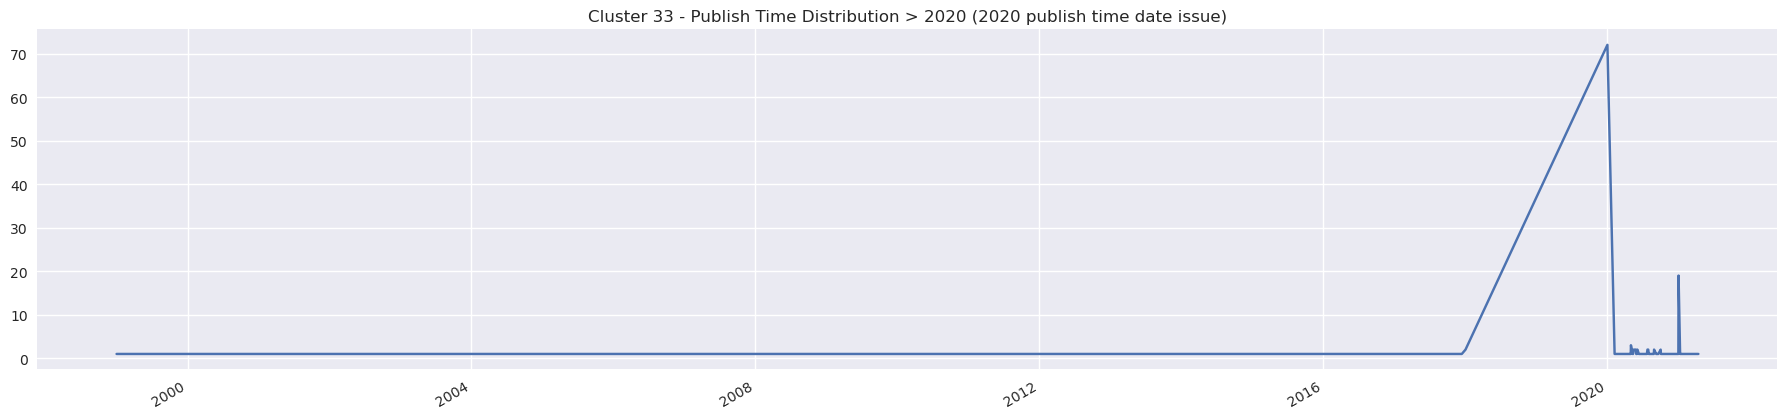

In [55]:
sample_seed_1_cluser_assinged_metadata_DF['publish_time'].value_counts().plot.line(figsize=(20,5),title = 'Cluster 33 - Publish Time Distribution > 2020 (2020 publish time date issue)')
plt.show()

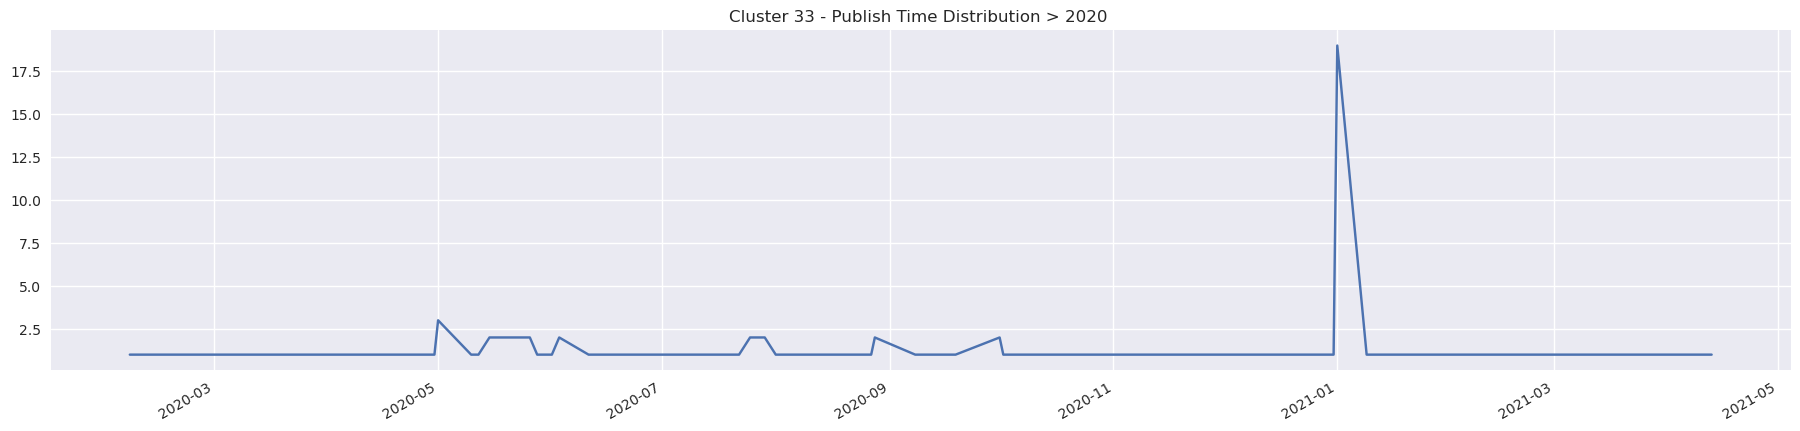

In [53]:
sample_seed_1_cluser_assinged_metadata_DF.loc[sample_seed_1_cluser_assinged_metadata_DF['publish_time']>'2020-01-01']['publish_time'].value_counts().plot.line(figsize=(20,5),title='Cluster 33 - Publish Time Distribution > 2020 ')
plt.show()

In [56]:
sample_seed_1_cluser_assinged_metadata_DF['publish_time'].value_counts().head(2)

2020-01-01    72
2021-01-01    19
Name: publish_time, dtype: int64

In [108]:
import gensim
gensim.__version__

'4.0.1'

#### LSI Background 
LSI provides both positive and negative weights per topic. A positive weight means the word is highly representative of a topic, while a negative weight means the word is highly unrepresentative of a topic (the less it occurs in a text, the more likely the topic).

In [80]:
from collections import defaultdict
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim import models

In [243]:
def tfidf_model(sample_seed_1_cluser_assinged_metadata_DF):
    title_courpus = sample_seed_1_cluser_assinged_metadata_DF['title'].dropna().drop_duplicates().values
    abstract_corpus = sample_seed_1_cluser_assinged_metadata_DF['abstract'].dropna().drop_duplicates().values
    total_documents = np.concatenate((title_courpus,abstract_corpus),axis=0)
    
    print('TOTAL CORPUS SHAPE:', total_documents.shape)
    total_documents_stopwords = [remove_stopwords(i) for i in list(total_documents) ]
    
    texts = [
    [word for word in document.lower().split() ]
    for document in total_documents_stopwords
    ]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    tfidf = models.TfidfModel(corpus)
    
    corpus_tfidf = tfidf[corpus]
    #for doc in corpus_tfidf:
    #    print(doc)
    


    return tfidf_model, corpus_tfidf, dictionary, corpus 

def lsi_model_train(corpus_tfidf,dictionary,num_topics):
    lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
    corpus_lsi = lsi_model[corpus_tfidf]
    print('TERMS IN LSI:',lsi_model.num_terms)
    
    
    return lsi_model, corpus_lsi

def plot_lsi_terms(lsi_model_temp,num_terms_visible,figsize=(20,30)):
    
    
    fig, axs = plt.subplots(lsi_model_temp.num_topics,figsize=figsize)
    fig.suptitle('LSI Term Weights per Topic across {} Topics'.format(lsi_model_temp.num_topics))
    
    for topic_num in range(lsi_model_temp.num_topics):
        term_df = pd.DataFrame([i.replace('"','').split('*') for i in lsi_model_temp.print_topic(topic_num,topn=num_terms_visible).split('+')]).rename(columns={0:'weight',1:'term'}).set_index('term')
        term_df['weight'] = term_df['weight'].astype(float)

        #axs[topic_num] = term_df.plot.barh(title='TOPIC {}'.format(topic_num))
        if lsi_model_temp.num_topics == 1:
            term_df.sort_values('weight').plot.barh(title='TOPIC {}'.format(topic_num),ax=axs)
        else:
            term_df.sort_values('weight').plot.barh(title='TOPIC {}'.format(topic_num),ax=axs[topic_num])

    plt.show()
    plt.close()

    
    
    
    

TOTAL CORPUS SHAPE: (167,)
TERMS IN LSI: 886


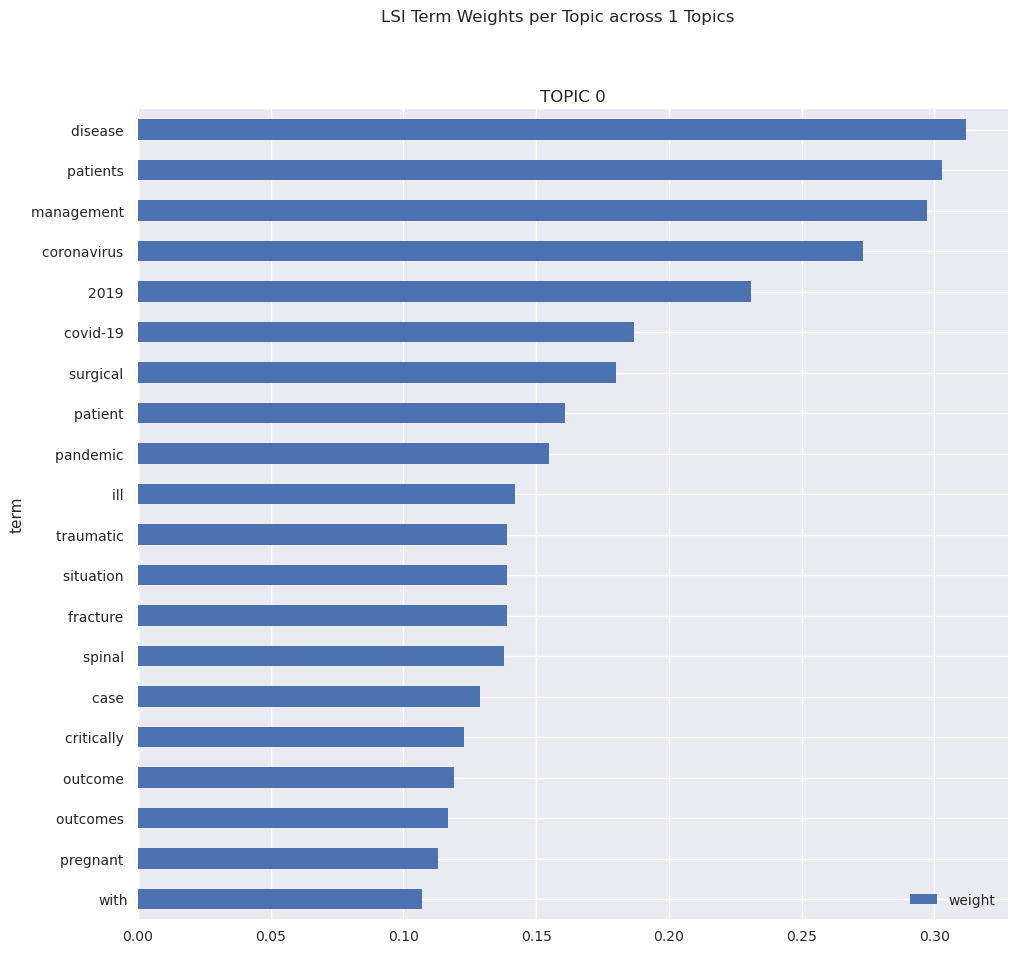

In [244]:
tfidf_model, corpus_tfidf, dictionary, corpus  = tfidf_model(sample_seed_1_cluser_assinged_metadata_DF)

lsi_model, corpus_lsi = lsi_model_train(corpus_tfidf,dictionary,num_topics= 1) 

plot_lsi_terms(lsi_model,20,figsize=(10,10))

In [222]:
lsi_model.num_topics

1

In [85]:
title_courpus = sample_seed_1_cluser_assinged_metadata_DF['title'].dropna().drop_duplicates().values

In [86]:
abstract_corpus = sample_seed_1_cluser_assinged_metadata_DF['abstract'].dropna().drop_duplicates().values

In [87]:
total_documents = np.concatenate((title_courpus,abstract_corpus),axis=0)

In [88]:
total_documents.shape

(167,)

In [ ]:
total_documents_stopwords = [remove_stopwords(i) for i in list(total_documents) ]

In [97]:
texts = [
    [word for word in document.lower().split() ]
    for document in total_documents_stopwords
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [98]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [101]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.5305187897555039), (1, 0.5305187897555039), (2, 0.5305187897555039), (3, 0.07759245346984557), (4, 0.38681888825857025)]
[(5, 0.5165716904320445), (6, 0.5165716904320445), (7, 0.4466106424308986), (8, 0.5165716904320445)]
[(9, 0.3099878304937022), (10, 0.2635012132630893), (11, 0.4251456525631788), (12, 0.4251456525631788), (13, 0.4251456525631788), (14, 0.4251456525631788), (15, 0.33388523774075896)]
[(16, 0.3805047095927925), (17, 0.5061805059210782), (18, 0.5854731051283801), (19, 0.5061805059210782)]
[(7, 0.3695786200198646), (20, 0.4274726895267451), (21, 0.4274726895267451), (22, 0.23515275350447684), (23, 0.4274726895267451), (24, 0.2778186908373147), (25, 0.4274726895267451)]
[(3, 0.06429962399591498), (4, 0.32055062003175266), (26, 0.43963242787913176), (27, 0.3800915239554422), (28, 0.43963242787913176), (29, 0.3452623279010426), (30, 0.32055062003175266), (31, 0.1446551013432895), (32, 0.3452623279010426)]
[(3, 0.06178826379700498), (33, 0.3652462314656232), (34, 0.33

In [141]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10) # initialize an LSI transformation

In [142]:

corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus:

In [143]:
lsi_model.num_terms

886

In [186]:
lsi_model.show_topics()

[(0,
  '0.311*"disease" + 0.304*"patients" + 0.294*"management" + 0.273*"coronavirus" + 0.234*"2019" + 0.188*"covid-19" + 0.180*"surgical" + 0.163*"patient" + 0.154*"pandemic" + 0.141*"ill"'),
 (1,
  '-0.275*"coronavirus" + 0.268*"surgical" + -0.253*"2019" + -0.224*"disease" + 0.196*"covid-19" + 0.182*"pandemic" + 0.179*"outcome" + -0.168*"situation" + -0.168*"traumatic" + -0.168*"fracture"'),
 (2,
  '-0.285*"surgical" + -0.242*"management" + -0.216*"outcome" + 0.202*"report" + 0.189*"case" + 0.177*"a" + -0.175*"pandemic" + 0.172*"covid-19." + -0.168*"hematoma" + -0.168*"affects"'),
 (3,
  '0.294*"patients" + -0.292*"case" + -0.260*"report" + 0.250*"covid-19." + 0.234*"care" + -0.170*"pneumonia:" + 0.164*"intensive" + -0.155*"a" + -0.145*"patients:" + -0.132*"prednisone/rituximab:"'),
 (4,
  '-0.293*"case" + 0.285*"patient" + 0.243*"pneumonia" + 0.232*"pulmonary" + -0.190*"care" + -0.157*"report" + -0.150*"pneumonia:" + 0.145*"acute" + -0.144*"ill" + 0.140*"embolism"'),
 (5,
  '-0.298*

In [140]:
lsi_model.print_topic(0,topn=40)

'0.313*"disease" + 0.302*"patients" + 0.299*"management" + 0.271*"coronavirus" + 0.231*"2019" + 0.188*"covid-19" + 0.182*"surgical" + 0.161*"patient" + 0.157*"pandemic" + 0.141*"ill" + 0.139*"situation" + 0.139*"fracture" + 0.139*"traumatic" + 0.136*"spinal" + 0.127*"case" + 0.120*"critically" + 0.119*"outcome" + 0.117*"outcomes" + 0.109*"with" + 0.108*"pregnant" + 0.101*"acute" + 0.095*"diabetes" + 0.095*"infection" + 0.094*"thyroid" + 0.091*"covid-19." + 0.088*"report" + 0.087*"care" + 0.075*"pancreatitis" + 0.075*"response" + 0.074*"clinical" + 0.071*"to:" + 0.069*"vascular" + 0.064*"a" + 0.063*"urgencies" + 0.063*"perinatal" + 0.062*"2019:" + 0.062*"series" + 0.060*"women" + 0.057*"subdural" + 0.057*"affects"'

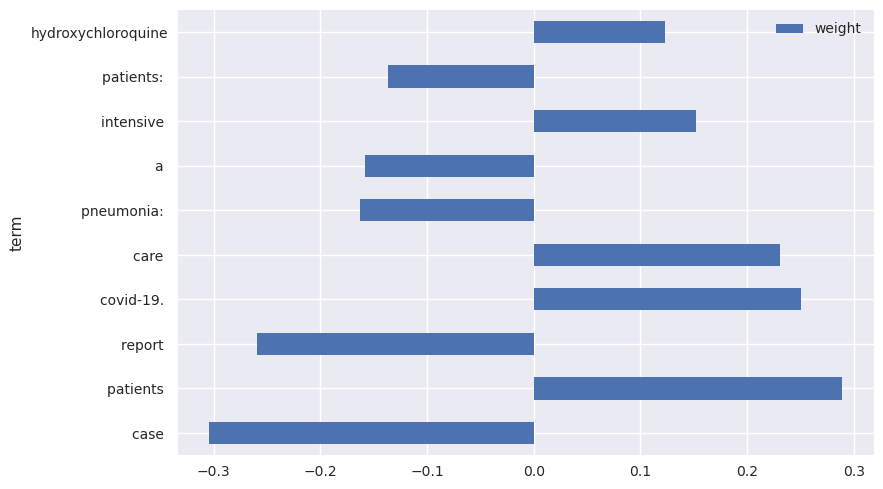

<function matplotlib.pyplot.close(fig=None)>

In [171]:
term_df = pd.DataFrame([i.replace('"','').split('*') for i in lsi_model.print_topic(3,topn=10).split('+')]).rename(columns={0:'weight',1:'term'}).set_index('term')
term_df['weight'] = term_df['weight'].astype(float)

term_df.plot.barh()
plt.show()
plt.close

In [193]:
plt.close()

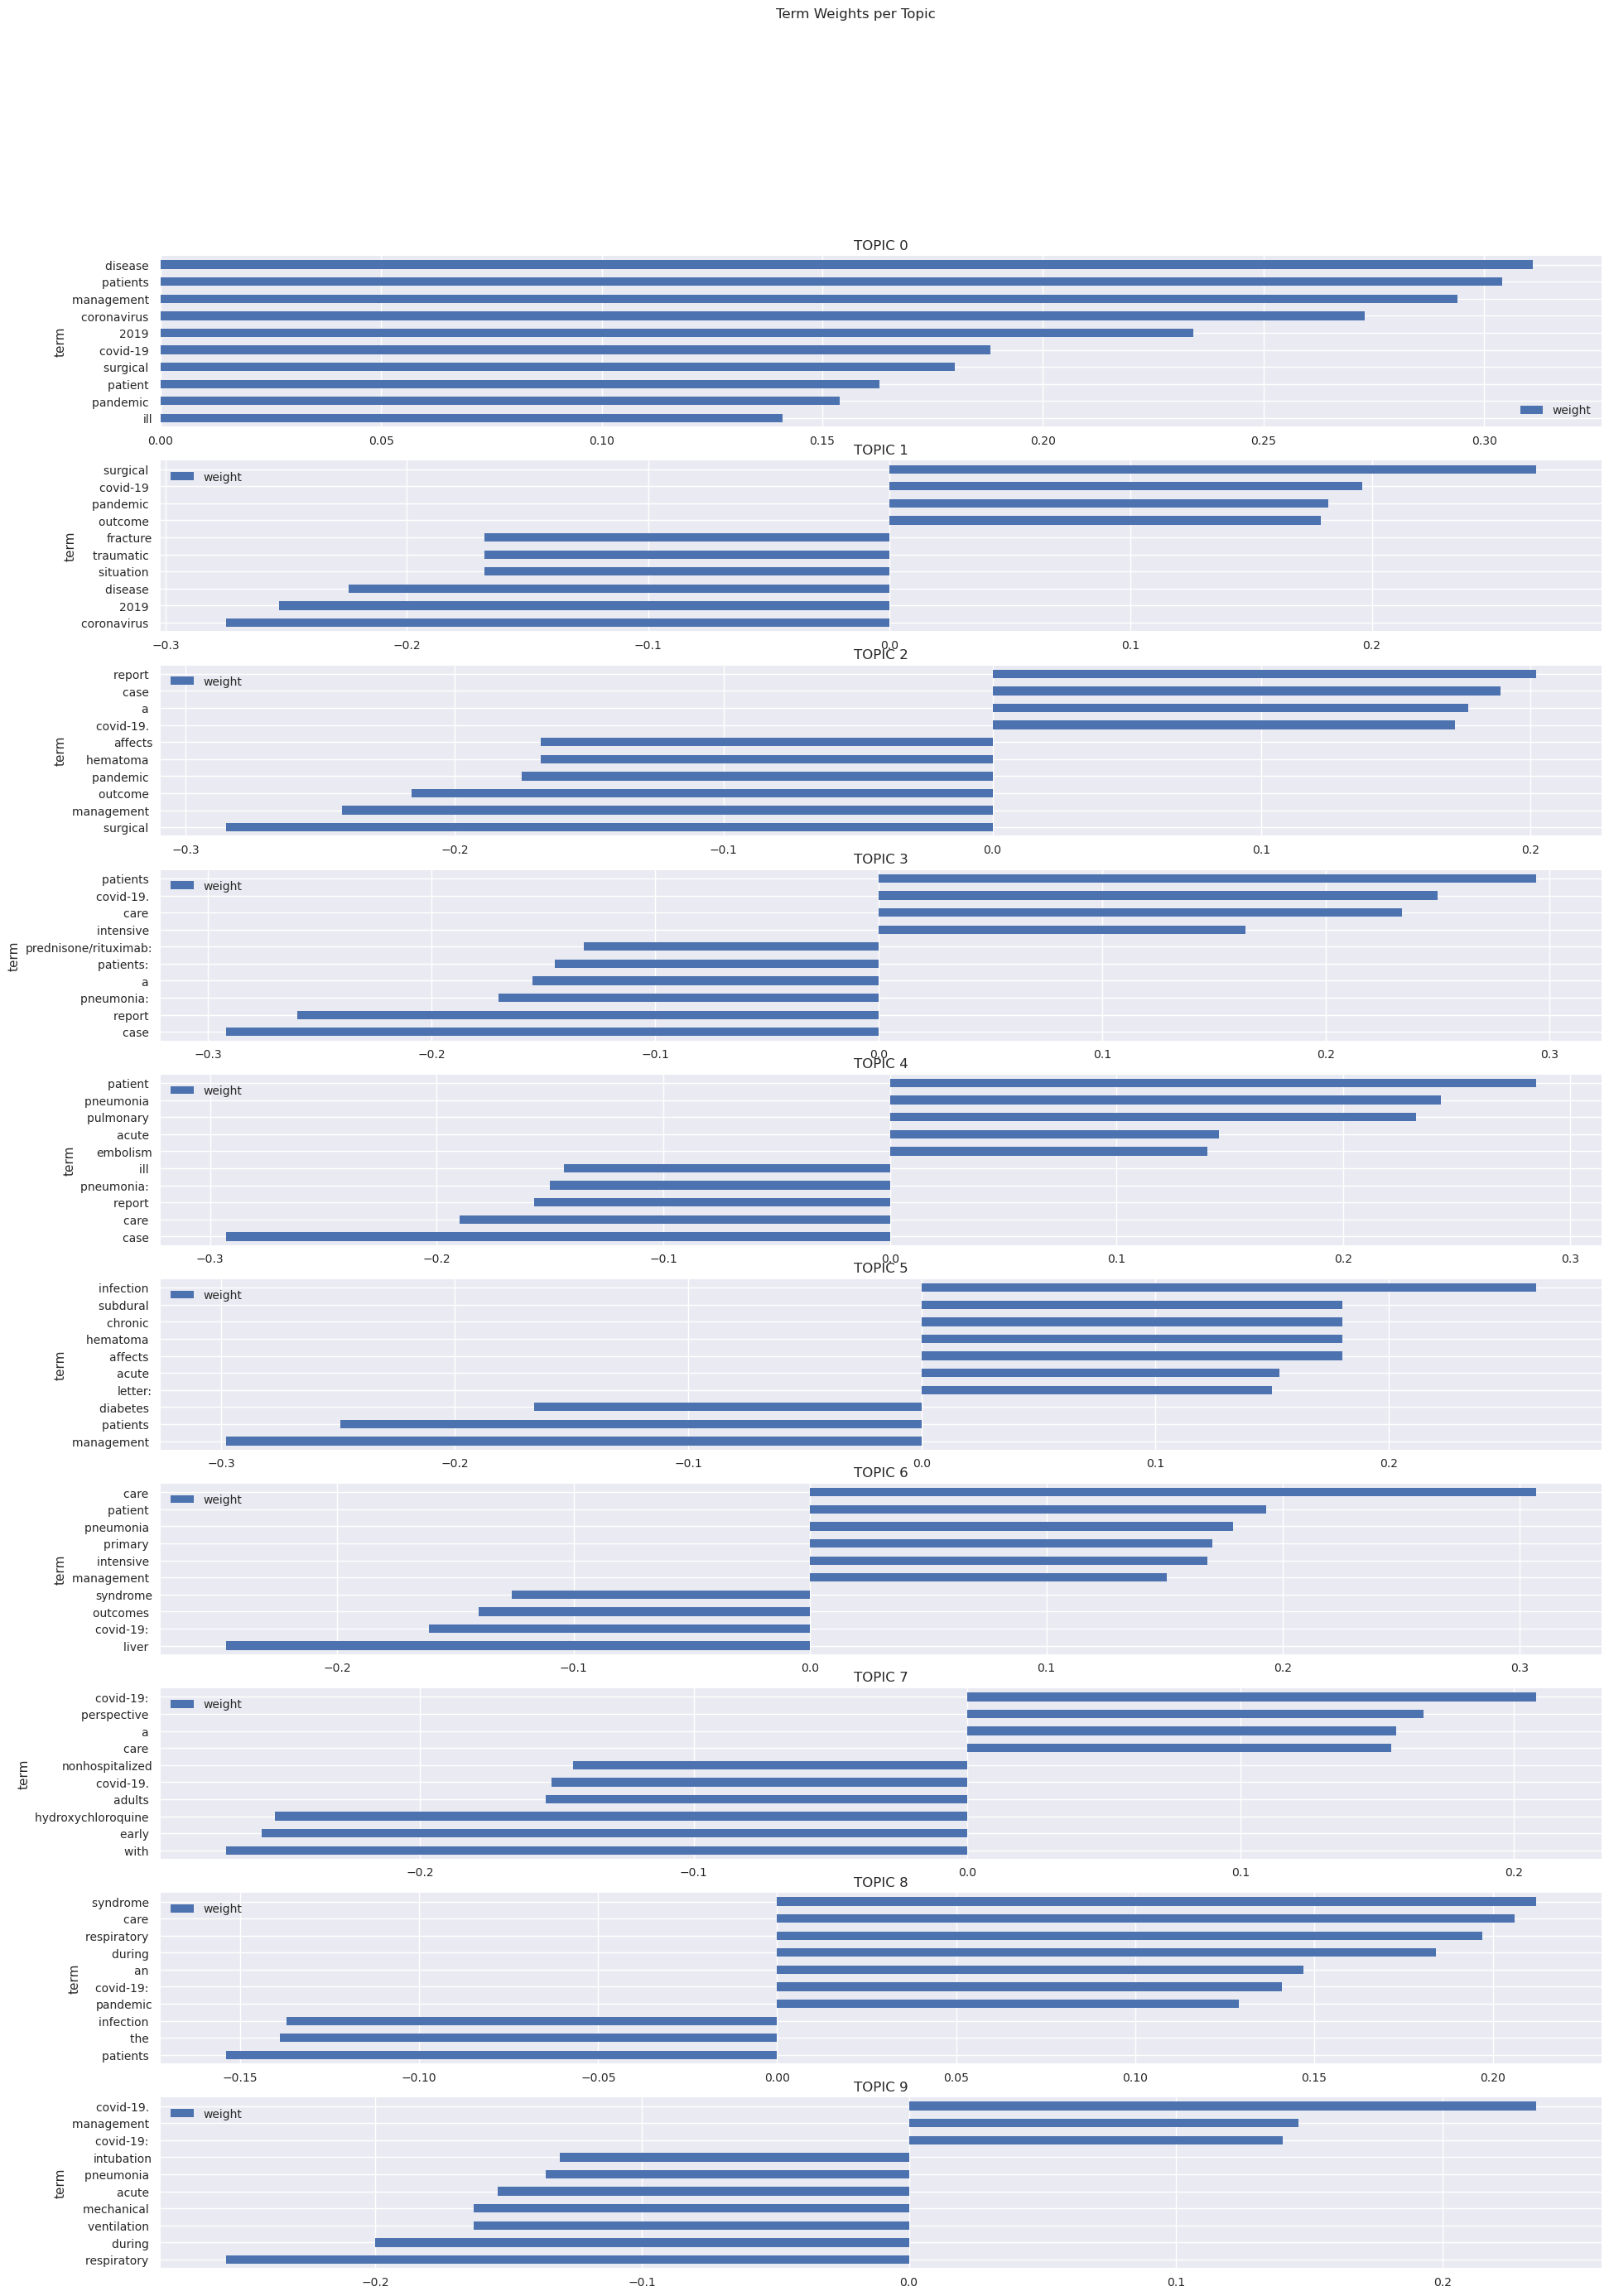

In [204]:
fig, axs = plt.subplots(lsi_model.num_topics,figsize=(20,30))
fig.suptitle('Term Weights per Topic')
for topic_num in range(lsi_model.num_topics):
    term_df = pd.DataFrame([i.replace('"','').split('*') for i in lsi_model.print_topic(topic_num,topn=10).split('+')]).rename(columns={0:'weight',1:'term'}).set_index('term')
    term_df['weight'] = term_df['weight'].astype(float)

    #axs[topic_num] = term_df.plot.barh(title='TOPIC {}'.format(topic_num))
    term_df.sort_values('weight').plot.barh(title='TOPIC {}'.format(topic_num),ax=axs[topic_num])
  
plt.show()
plt.close()


In [173]:
x=1
y= -2

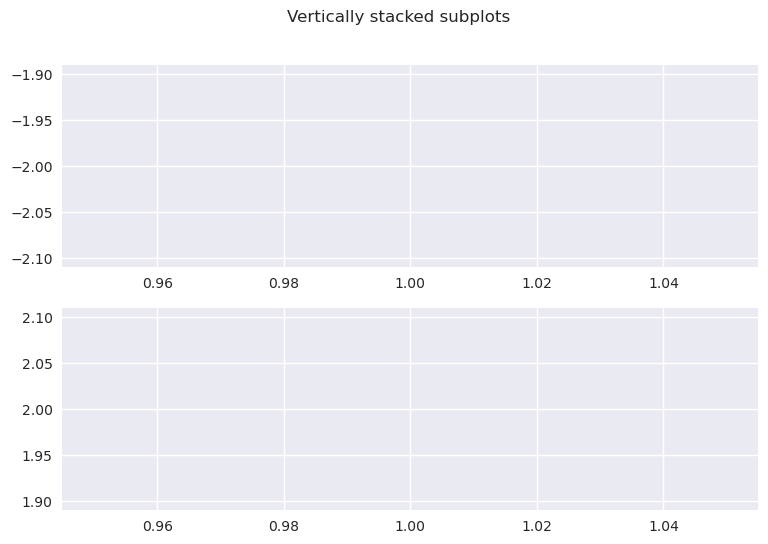

In [179]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)
plt.show()
plt.close()

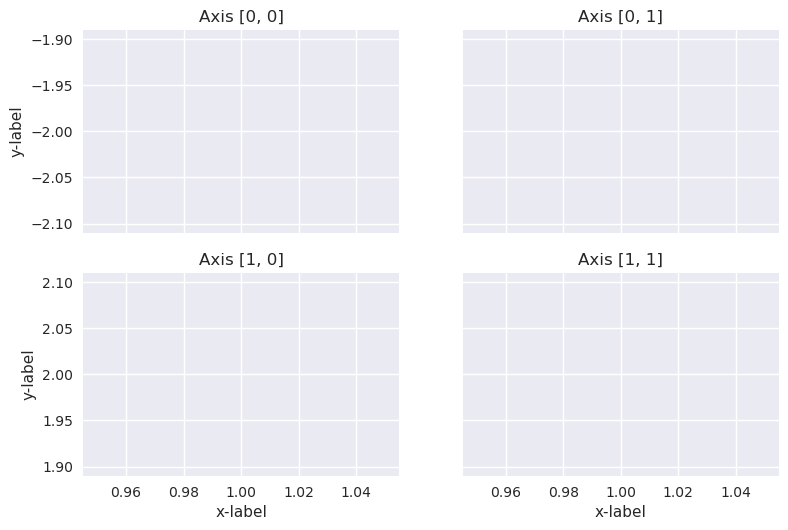

In [176]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()
plt.close()